In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('ml-100k/u.data',sep='\t',names=['user_id','item_id','rating','ts'])
df.head()

,user_id,item_id,rating,ts
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100000 non-null  int64
 1   item_id  100000 non-null  int64
 2   rating   100000 non-null  int64
 3   ts       100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
cols='item_id|title|release date|video release date|\
              IMDb URL|unknown|Action|Adventure|Animation|\
              Childrens|Comedy|Crime|Documentary|Drama|Fantasy|\
              Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|\
              Thriller|War|Western|'.split('|')
movies=pd.read_csv('ml-100k/u.item',sep='|',names=cols)
movies.head()

,item_id,title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,NaN
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN


In [7]:
movies[['item_id','title']].head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
df.drop('ts',axis=1).head()


,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [9]:
data=pd.merge(df.drop('ts',axis=1),movies[['item_id','title']],on='item_id')
data.head()

,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  100000 non-null  int64 
 1   item_id  100000 non-null  int64 
 2   rating   100000 non-null  int64 
 3   title    100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.8+ MB


In [11]:
data.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [12]:


len(data['title'].unique())
data['title'].nunique()

1664

In [13]:
data['user_id'].nunique()

943

In [14]:
avg_rates=data.groupby('title')['rating'].mean()
avg_rates.head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [15]:
movies = data['title'].unique()
for m in movies:
    print(m,' '*50,data['rating'][data['title']==m].mean())ppppppppppppppppp

SyntaxError: invalid syntax (<ipython-input-15-21fa9abc3af6>, line 3)

In [16]:
avg_rates.sort_values(ascending=False).head(10)


title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

In [17]:
rate_count=data.groupby('title')['rating'].count()
rate_count.head()

title
'Til There Was You (1997)      9
1-900 (1994)                   5
101 Dalmatians (1996)        109
12 Angry Men (1957)          125
187 (1997)                    41
Name: rating, dtype: int64

In [18]:
rate_count.sort_values(ascending=False).head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

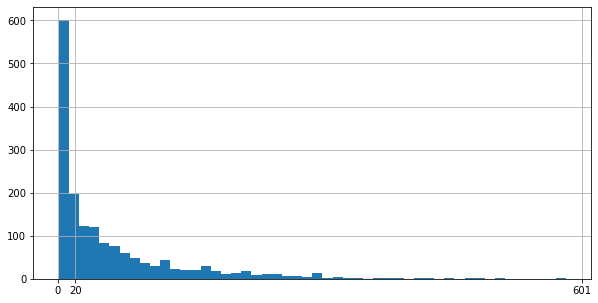

In [19]:
plt.figure(figsize=(10,5))
rate_count.hist(bins=50)
t=plt.xticks([0,601,20])

<AxesSubplot:>

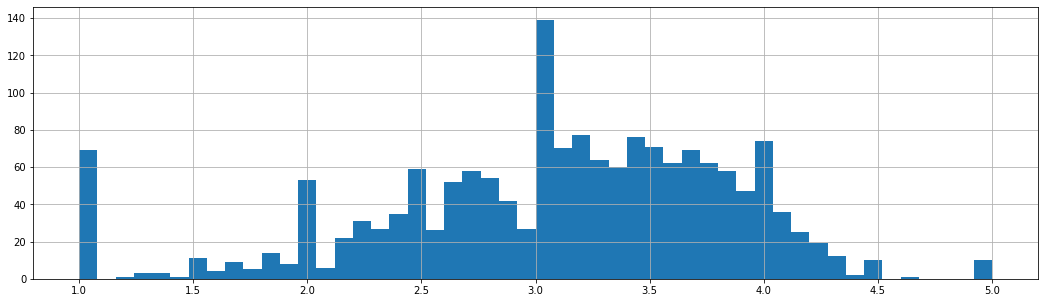

In [20]:
plt.figure(figsize=(18,5))
avg_rates.hist(bins=50)

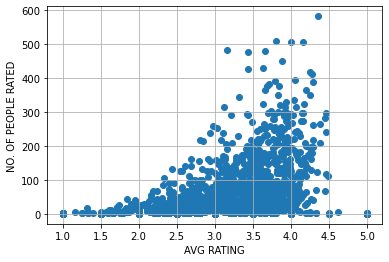

In [21]:
plt.scatter(x=avg_rates,y=rate_count)
plt.xlabel('AVG RATING')
plt.ylabel('NO. OF PEOPLE RATED')
plt.grid()

In [22]:
df_pivot = data.pivot_table(index='user_id',columns='title',values='rating')
df_pivot.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [35]:
inp='Heavyweights (1994)'

In [36]:
df_pivot[inp].head()

user_id
1    NaN
2    NaN
3    NaN
4    NaN
5    1.0
Name: Heavyweights (1994), dtype: float64

In [37]:
sim_inp=df_pivot.corrwith(df_pivot[inp])

D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [38]:
sim_inp

title
'Til There Was You (1997)                     NaN
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.652473
12 Angry Men (1957)                      0.422577
187 (1997)                                    NaN
                                           ...   
Young Guns II (1990)                    -1.000000
Young Poisoner's Handbook, The (1995)         NaN
Zeus and Roxanne (1997)                       NaN
unknown                                       NaN
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [39]:
sim_df=pd.DataFrame(sim_inp,columns=['Correlation'])
sim_df.head()

,Correlation
title,
'Til There Was You (1997),NaN
1-900 (1994),NaN
101 Dalmatians (1996),0.652473
12 Angry Men (1957),0.422577
187 (1997),NaN


In [40]:
sim_df.sort_values(by='Correlation',ascending=False).head(10)

,Correlation
title,
"Indian in the Cupboard, The (1995)",1.0
Cabin Boy (1994),1.0
Ma vie en rose (My Life in Pink) (1997),1.0
Angus (1995),1.0
Tie Me Up! Tie Me Down! (1990),1.0
It Takes Two (1995),1.0
Race the Sun (1996),1.0
Made in America (1993),1.0
Thinner (1996),1.0


In [41]:
sim_df['count']= rate_count
sim_df['avg_rate']= avg_rates
sim_df.head()

,Correlation,count,avg_rate
title,,,
'Til There Was You (1997),NaN,9,2.333333
1-900 (1994),NaN,5,2.600000
101 Dalmatians (1996),0.652473,109,2.908257
12 Angry Men (1957),0.422577,125,4.344000
187 (1997),NaN,41,3.024390


In [42]:
sim_df[(sim_df['count']>100)].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,count,avg_rate
title,,,
Murder at 1600 (1997),1.0,218,3.087156
"Full Monty, The (1997)",1.0,315,3.926984
Seven Years in Tibet (1997),1.0,155,3.458065
Donnie Brasco (1997),1.0,147,3.802721
Cop Land (1997),1.0,175,3.377143
"Peacemaker, The (1997)",1.0,136,3.272059
Shine (1996),1.0,129,3.922481
"Sex, Lies, and Videotape (1989)",1.0,101,3.475248
"Room with a View, A (1986)",1.0,134,3.985075


In [43]:
sim_df.columns

Index(['Correlation', 'count', 'avg_rate'], dtype='object')

sim_df.drop(('count',),axis=1,inplace=True)
sim_df.drop(('avg_rate',),axis=1,inplace=True)

In [53]:
recom=sim_df[(sim_df['count']>100)].sort_values(by='Correlation',ascending=False).head(10)
recom.drop(inp,axis=0,inplace=True)
recommended=recom.index[:3]
for r in recommended:
 print(r)

KeyError: "['Heavyweights (1994)'] not found in axis"